In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
!ls

AAPL.csv    fb.ipynb  __pycache__			TSLAdata.csv
AMZN.csv    GOOG.csv  Stock-Predictor-using-LSTM.ipynb
FB.csv	    lstm.py   Test.ipynb
FBdata.csv  NFLX.csv  TSLA.csv


In [60]:
col_names = ['Timestamp','Sequence','Open','High','Low','Close','Volume']
tesla = pd.read_csv('NFLX.csv')
tesla.columns = col_names
tesla['Timestamp'] =  pd.to_datetime(tesla['Timestamp'],format='%Y-%m-%d %H:%M:%S')
tesla.index = tesla['Timestamp']
tesla.head()

,Timestamp,Sequence,Open,High,Low,Close,Volume
Timestamp,,,,,,,
2018-03-12 15:49:00,2018-03-12 15:49:00,a1520869740,323.8800,324.1350,323.8000,324.0721,11725
2018-03-12 15:50:00,2018-03-12 15:50:00,1,324.0598,324.1200,323.9000,323.9600,15120
2018-03-12 15:51:00,2018-03-12 15:51:00,2,323.9700,324.0500,323.6000,324.0000,27216
2018-03-12 15:52:00,2018-03-12 15:52:00,3,323.7800,323.9169,323.7202,323.8300,21313
2018-03-12 15:53:00,2018-03-12 15:53:00,4,324.0000,324.0150,323.6400,323.7100,19892


In [61]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31738 entries, 2018-03-12 15:49:00 to 2018-07-06 20:00:00
Data columns (total 7 columns):
Timestamp    31738 non-null datetime64[ns]
Sequence     31738 non-null object
Open         31738 non-null float64
High         31738 non-null float64
Low          31738 non-null float64
Close        31738 non-null float64
Volume       31738 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.9+ MB


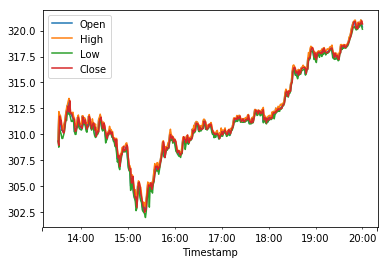

In [62]:
df = tesla.loc['2018-03-26'][['Open','High','Low','Close']]
df.plot()

In [63]:
df.shape

(391, 4)

In [64]:
df = df.resample('1Min').ffill()

"\nplt.subplot(1,2,2);\nplt.plot(df.Volume.values, color='black', label='volume')\nplt.title('stock volume')\nplt.xlabel('time')\nplt.ylabel('volume')\nplt.legend(loc='best');\n"

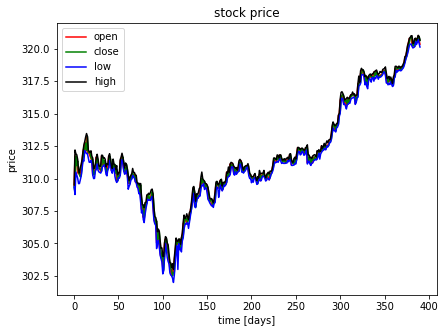

In [65]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()
'''
plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time')
plt.ylabel('volume')
plt.legend(loc='best');
'''

In [66]:
df.shape

(391, 4)

In [67]:
df.head()

,Open,High,Low,Close
Timestamp,,,,
2018-03-26 13:30:00,309.5000,309.50,309.3600,309.3600
2018-03-26 13:31:00,311.7500,312.20,308.7712,308.9500
2018-03-26 13:32:00,311.1300,311.91,310.5000,311.7500
2018-03-26 13:33:00,311.3552,311.83,310.2500,311.0000
2018-03-26 13:34:00,310.4300,311.48,310.0300,311.3605


## 2.Function for testing stationarity

In [68]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 5));
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    plt.figure(figsize=(15, 5));
    plt.title('Standard Deviation')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_Min_volatility', '50_Min_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [69]:
test_df = df[['Close']]

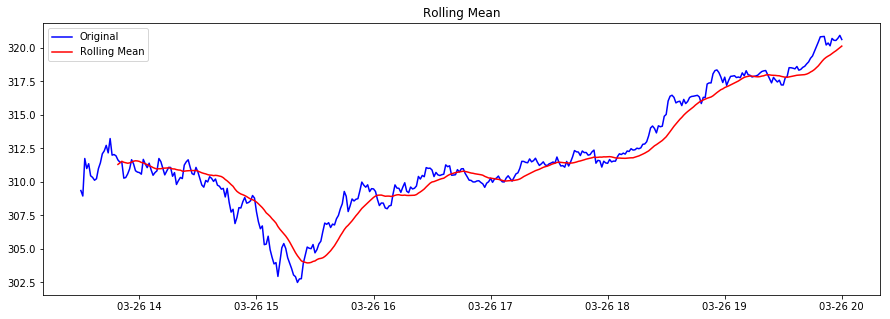

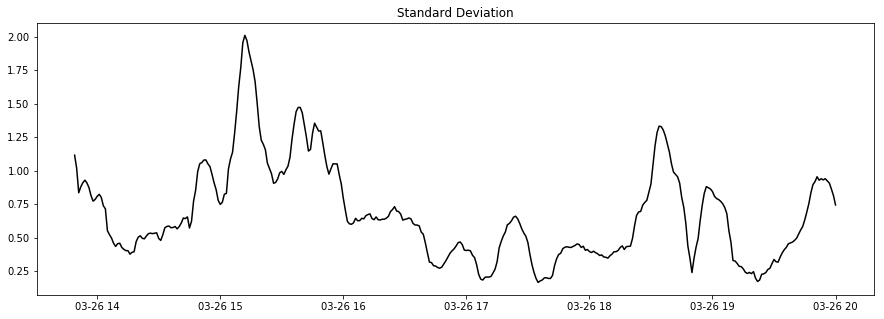

Results of Dickey-Fuller Test:
open                      0.035958
high                      0.961407
10_Min_volatility         0.000000
50_Min_moving_avg       390.000000
Critical Value (1%)      -3.447229
Critical Value (5%)      -2.868980
Critical Value (10%)     -2.570733
dtype: float64


In [70]:
test_stationarity(test_df)

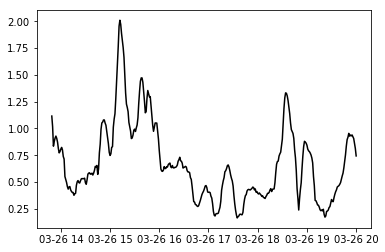

In [71]:
rolstd = test_df.rolling(20).std()
plt.plot(rolstd, color='black', label = 'Rolling Std')

# Making Data Stationary
## Estimating & Eliminating Trend

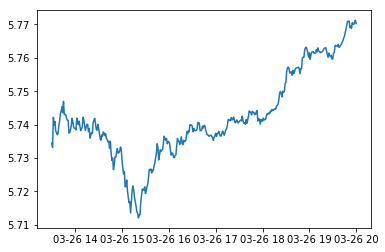

In [72]:
ts_log = np.log(test_df)
plt.plot(ts_log)

# Smoothing:
## Moving average

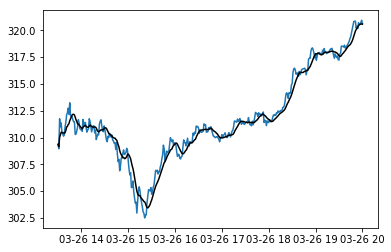

In [73]:
moving_avg = test_df.rolling(10, min_periods=1).mean()
plt.plot(test_df)
plt.plot(moving_avg, color='black')

In [74]:
moving_avg.head()

,Close
Timestamp,
2018-03-26 13:30:00,309.3600
2018-03-26 13:31:00,309.1550
2018-03-26 13:32:00,310.0200
2018-03-26 13:33:00,310.2650
2018-03-26 13:34:00,310.4841


In [75]:
ts_log_moving_avg_diff   = test_df - moving_avg
ts_log_moving_avg_diff.head(5)

,Close
Timestamp,
2018-03-26 13:30:00,0.0000
2018-03-26 13:31:00,-0.2050
2018-03-26 13:32:00,1.7300
2018-03-26 13:33:00,0.7350
2018-03-26 13:34:00,0.8764


In [76]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

,Close
Timestamp,
2018-03-26 13:30:00,0.0000
2018-03-26 13:31:00,-0.2050
2018-03-26 13:32:00,1.7300
2018-03-26 13:33:00,0.7350
2018-03-26 13:34:00,0.8764


In [77]:
ts_log_moving_avg_diff.shape

(391, 1)

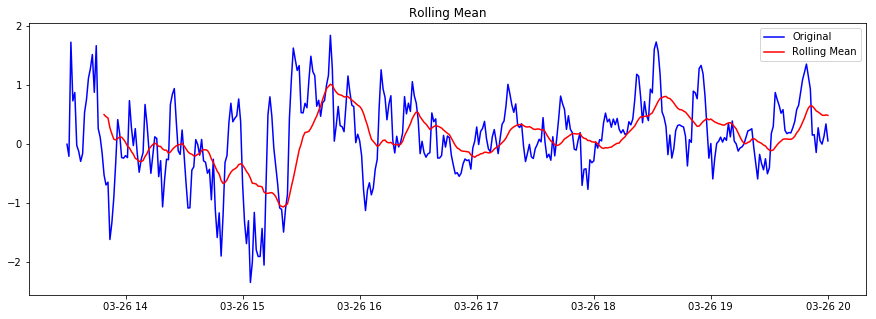

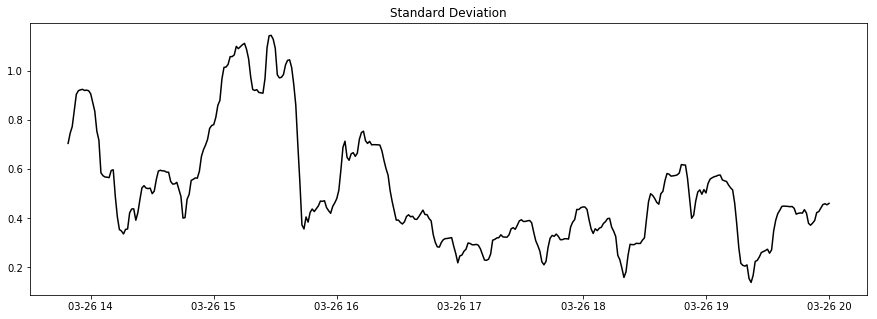

Results of Dickey-Fuller Test:
open                   -6.857835e+00
high                    1.631139e-09
10_Min_volatility       3.000000e+00
50_Min_moving_avg       3.870000e+02
Critical Value (1%)    -3.447361e+00
Critical Value (5%)    -2.869037e+00
Critical Value (10%)   -2.570764e+00
dtype: float64


In [78]:
test_stationarity(ts_log_moving_avg_diff)

## Exponentially Weighted Moving Average¶

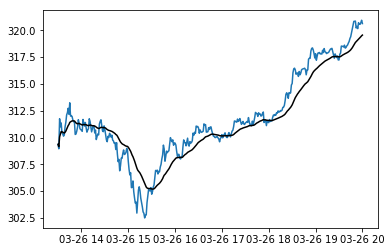

In [79]:
expwighted_avg = test_df.ewm(halflife=12).mean()
plt.plot(test_df)
plt.plot(expwighted_avg, color='black')
#expwighted_avg.plot(style='k--')

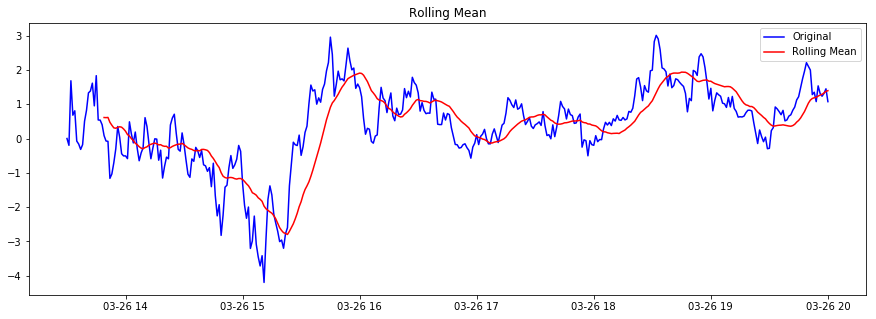

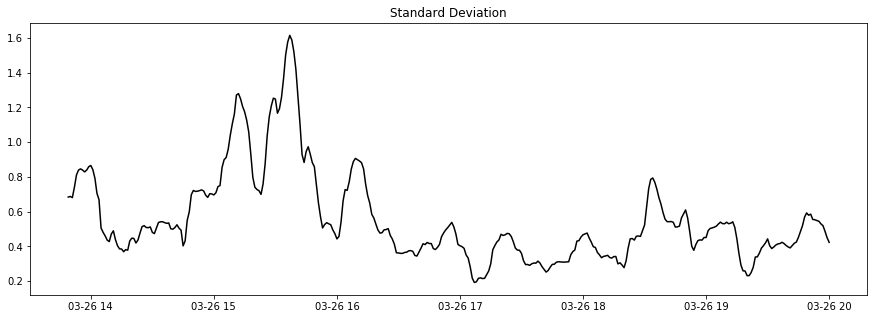

Results of Dickey-Fuller Test:
open                     -3.281979
high                      0.015703
10_Min_volatility         0.000000
50_Min_moving_avg       390.000000
Critical Value (1%)      -3.447229
Critical Value (5%)      -2.868980
Critical Value (10%)     -2.570733
dtype: float64


In [80]:
ts_log_ewma_diff  = test_df - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Eliminating Trend and Seasonality
## Differencing:

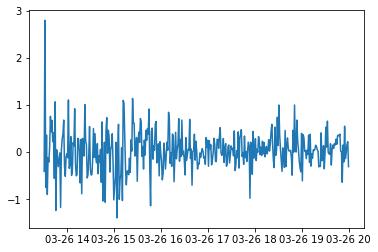

In [81]:
#Take first difference:
ts_log_diff = test_df - test_df.shift()
plt.plot(ts_log_diff)

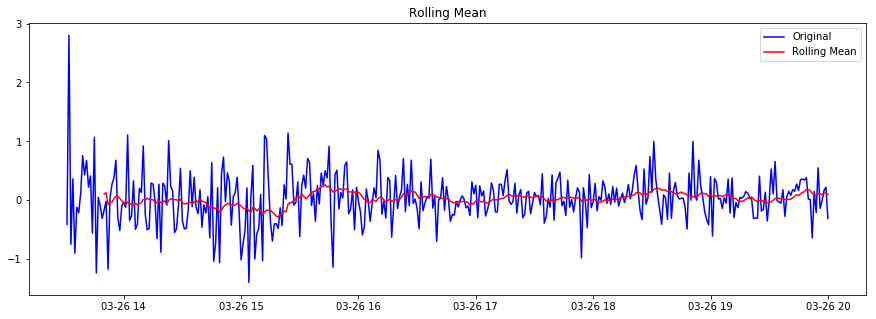

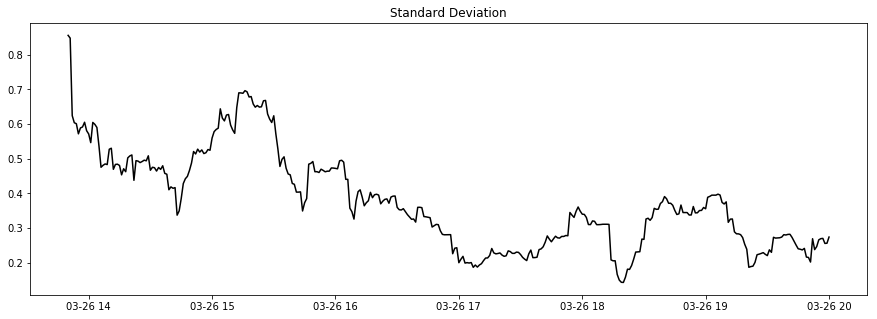

Results of Dickey-Fuller Test:
open                    -20.483524
high                      0.000000
10_Min_volatility         0.000000
50_Min_moving_avg       389.000000
Critical Value (1%)      -3.447273
Critical Value (5%)      -2.868999
Critical Value (10%)     -2.570743
dtype: float64


In [82]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposition:

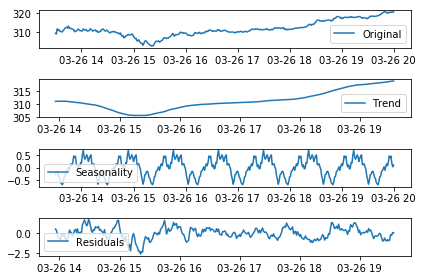

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(test_df, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(test_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

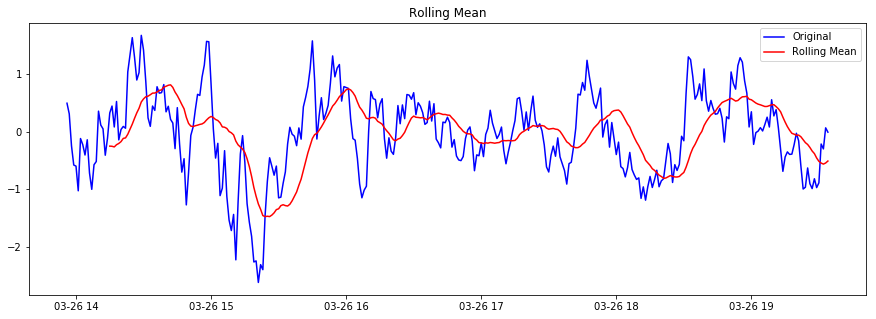

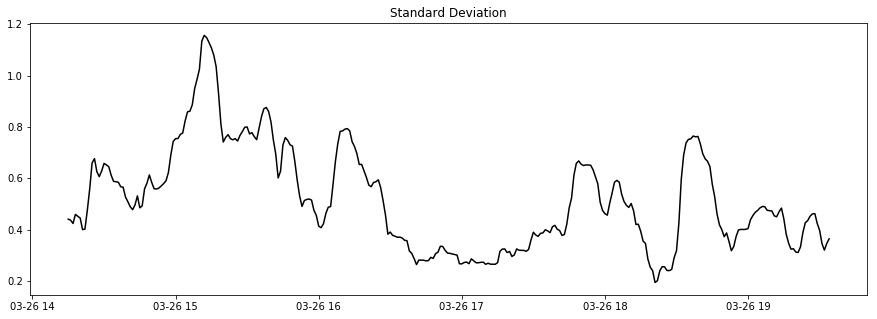

Results of Dickey-Fuller Test:
open                     -4.707206
high                      0.000082
10_Min_volatility         0.000000
50_Min_moving_avg       338.000000
Critical Value (1%)      -3.449846
Critical Value (5%)      -2.870129
Critical Value (10%)     -2.571346
dtype: float64


In [84]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [85]:
from statsmodels.tsa.arima_model import ARIMA

## ACF & PACF Plots

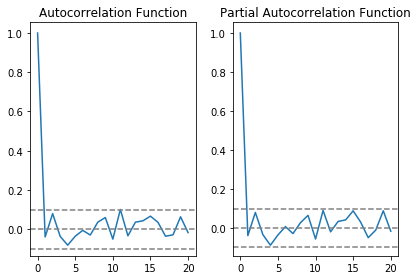

In [86]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## AR Model:

/home/aurobindo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/aurobindo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/aurobindo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

Text(0.5,1,'RSS: 70.0187')

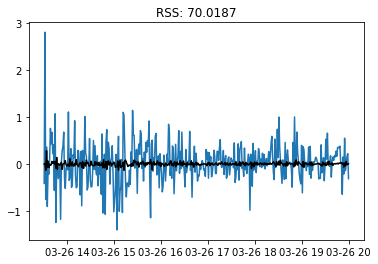

In [87]:
#MA model:
model = ARIMA(test_df, order=(2, 1, 0))  
results_AR = model.fit(disp=-1,trend='nc')  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='black')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['Close'])**2))

## MA Model

Text(0.5,1,'RSS: 69.6541')

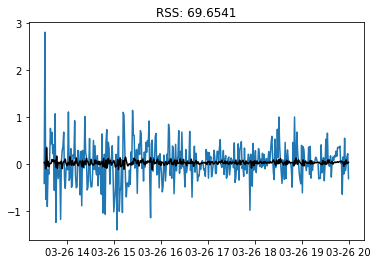

In [88]:
model = ARIMA(test_df, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='black')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['Close'])**2))

## ARIMA Model:

Text(0.5,1,'RSS (Root Squared Sum): 69.0736')

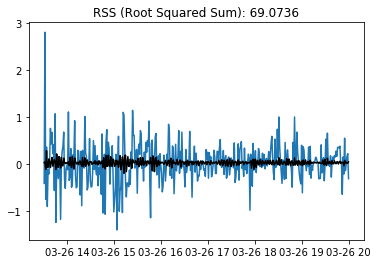

In [89]:
model = ARIMA(test_df,order=(2,1,2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='black')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['Close'])**2))

## Convert to original scale:

In [90]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Timestamp
2018-03-26 13:31:00    0.029272
2018-03-26 13:32:00    0.047300
2018-03-26 13:33:00   -0.110521
2018-03-26 13:34:00    0.284366
2018-03-26 13:35:00   -0.066986
Freq: T, dtype: float64

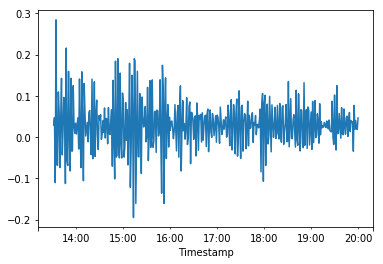

In [91]:
predictions_ARIMA_diff.plot()

In [92]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Timestamp
2018-03-26 13:31:00    0.029272
2018-03-26 13:32:00    0.076572
2018-03-26 13:33:00   -0.033948
2018-03-26 13:34:00    0.250418
2018-03-26 13:35:00    0.183432
Freq: T, dtype: float64

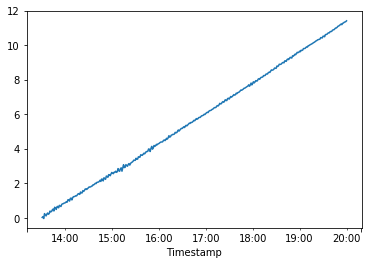

In [93]:
predictions_ARIMA_diff_cumsum.plot()

In [94]:
predictions_ARIMA_log = pd.Series(test_df.iloc[0], index=test_df.index)
predictions_ARIMA_log.iloc[:] = test_df.iloc[0].values[0]
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head() 

Timestamp
2018-03-26 13:30:00    309.360000
2018-03-26 13:31:00    309.389272
2018-03-26 13:32:00    309.436572
2018-03-26 13:33:00    309.326052
2018-03-26 13:34:00    309.610418
Freq: T, dtype: float64

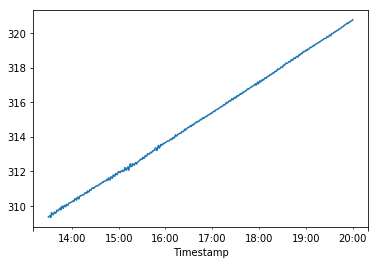

In [95]:
predictions_ARIMA_log.plot()

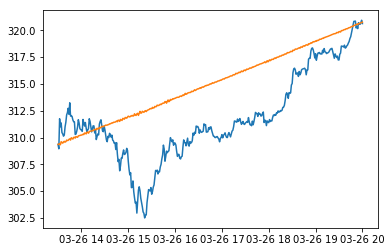

In [96]:
plt.plot(test_df)
plt.plot(predictions_ARIMA_log)

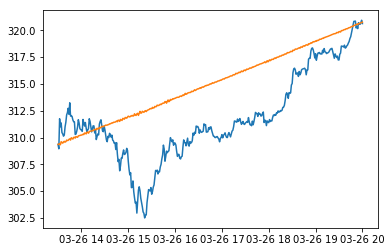

In [97]:
predictions_ARIMA = predictions_ARIMA_log
plt.plot(test_df)
plt.plot(predictions_ARIMA)

Text(0.5,1,'RMSE: 4.1579')

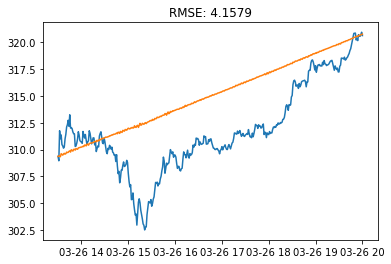

In [98]:
predictions_ARIMA = predictions_ARIMA_log
plt.plot(test_df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-test_df['Close'])**2)/len(test_df)))